<a href="https://colab.research.google.com/github/Andrew55529/IMDP/blob/master/anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as mpl
import seaborn as sns

In [70]:
data = pd.read_csv("anime.csv", sep=",",na_values=["?","-"])  #1 Считывание файла

In [71]:
data.head(10)   #2 Вывод нескольких строк(10)

,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
0,Shingeki no Kyojin,Wit Studio,25.0,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,"3,142,121","Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64.0,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,"2,676,911",Military
2,Sword Art Online,A-1 Pictures,25.0,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,"2,586,628",Game
3,One Punch Man,Madhouse,12.0,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,"2,583,068","Parody,Super Power"
4,Boku no Hero Academia,Bones,13.0,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,"2,426,309","School,Super Power"
5,Tokyo Ghoul,Studio Pierrot,12.0,Manga,"Action,Drama,Horror,Mystery,Supernatural","Jul 4, 2014, 00:00 (JST)",7.80,"2,315,361",Psychological
6,Naruto,Studio Pierrot,220.0,Manga,"Action,Adventure,Comedy","Oct 3, 2002, 19:30 (JST)",7.95,"2,289,448","Martial Arts,Super Power"
7,Hunter x Hunter (2011),Madhouse,148.0,Manga,"Action,Adventure,Fantasy","Oct 2, 2011, 10:55 (JST)",9.06,"2,152,116",Super Power
8,Kimetsu no Yaiba,ufotable,26.0,Manga,"Action,Supernatural","Apr 6, 2019, 23:30 (JST)",8.57,"2,112,029","Demons,Historical"
9,Shingeki no Kyojin Season 2,Wit Studio,12.0,Manga,"Action,Drama,Fantasy,Mystery","Apr 1, 2017, 22:00 (JST)",8.49,"2,086,165","Military,Super Power"


In [72]:
print(data.dtypes) #3

Title          object
Production     object
Episodes      float64
Source         object
Genre          object
Airdate        object
Rating        float64
Voters         object
Theme          object
dtype: object


In [73]:
data.columns = data.columns.str.lower().str.replace(' ', '_')  #4


In [74]:
data['voters']=data['voters'].str.replace(',','')
data['voters'] = data['voters'].astype('int64')
data.describe(percentiles = [.90], include = ['float64','int64'])  #5 

,episodes,rating,voters
count,1939.000000,1944.000000,1.992000e+03
mean,14.975245,7.150849,1.643311e+05
std,28.116711,0.709454,3.135926e+05
min,1.000000,2.960000,8.662000e+03
50%,12.000000,7.210000,5.478550e+04
90%,26.000000,8.030000,4.041658e+05
max,500.000000,9.160000,3.142121e+06


In [75]:
source_uniq_count=data['source'].value_counts()
print(source_uniq_count)                            #6
genre_diff=pd.Series(sum(data['genre'].str.split(','),[])).value_counts()
print(genre_diff)

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
Web manga        32
Card game         9
Book              1
Picture book      1
Name: source, dtype: int64
Action           1992
Fantasy           711
Comedy            645
Adventure         620
Sci-Fi            610
Supernatural      454
Drama             447
Romance           225
Mystery           187
Ecchi             173
Horror            109
Sports             59
Slice of Life      29
Suspense           29
Girls Love         11
Avant Garde        10
Boys Love           9
Gourmet             5
Work Life           1
dtype: int64


Больше всего аниме выпустила компания -  Toei Animation


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


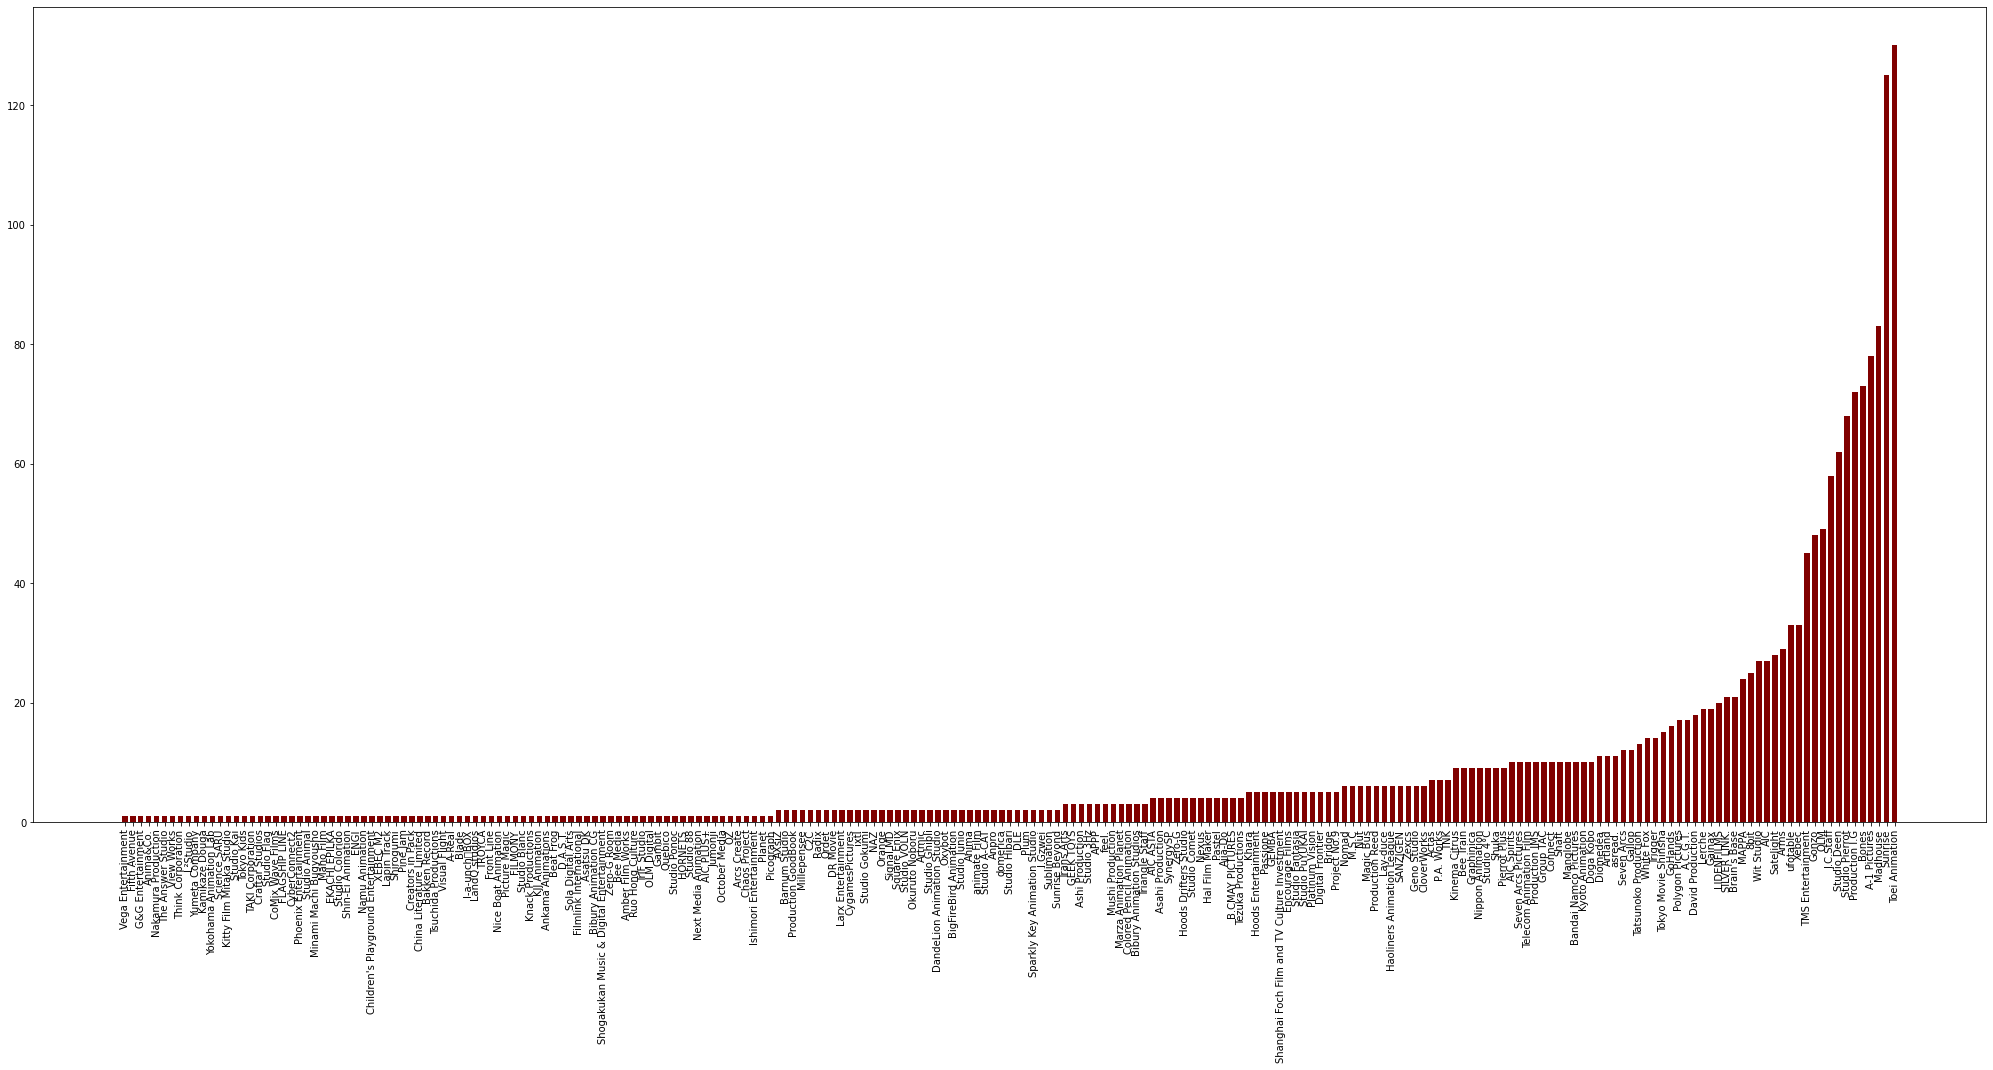

In [76]:
production_uniq_count=data["production"].value_counts()
fig = mpl.figure(figsize = (35, 15))
mpl.bar(production_uniq_count.index, production_uniq_count.values, color ='maroon', width = 0.7)
mpl.xticks(rotation=90)
mpl.gca().invert_xaxis()
mpl.show    #8a
print("Больше всего аниме выпустила компания - ", production_uniq_count.index[0])

Чаще всего встречается аниме с кол-вом эпизодов -  1.0


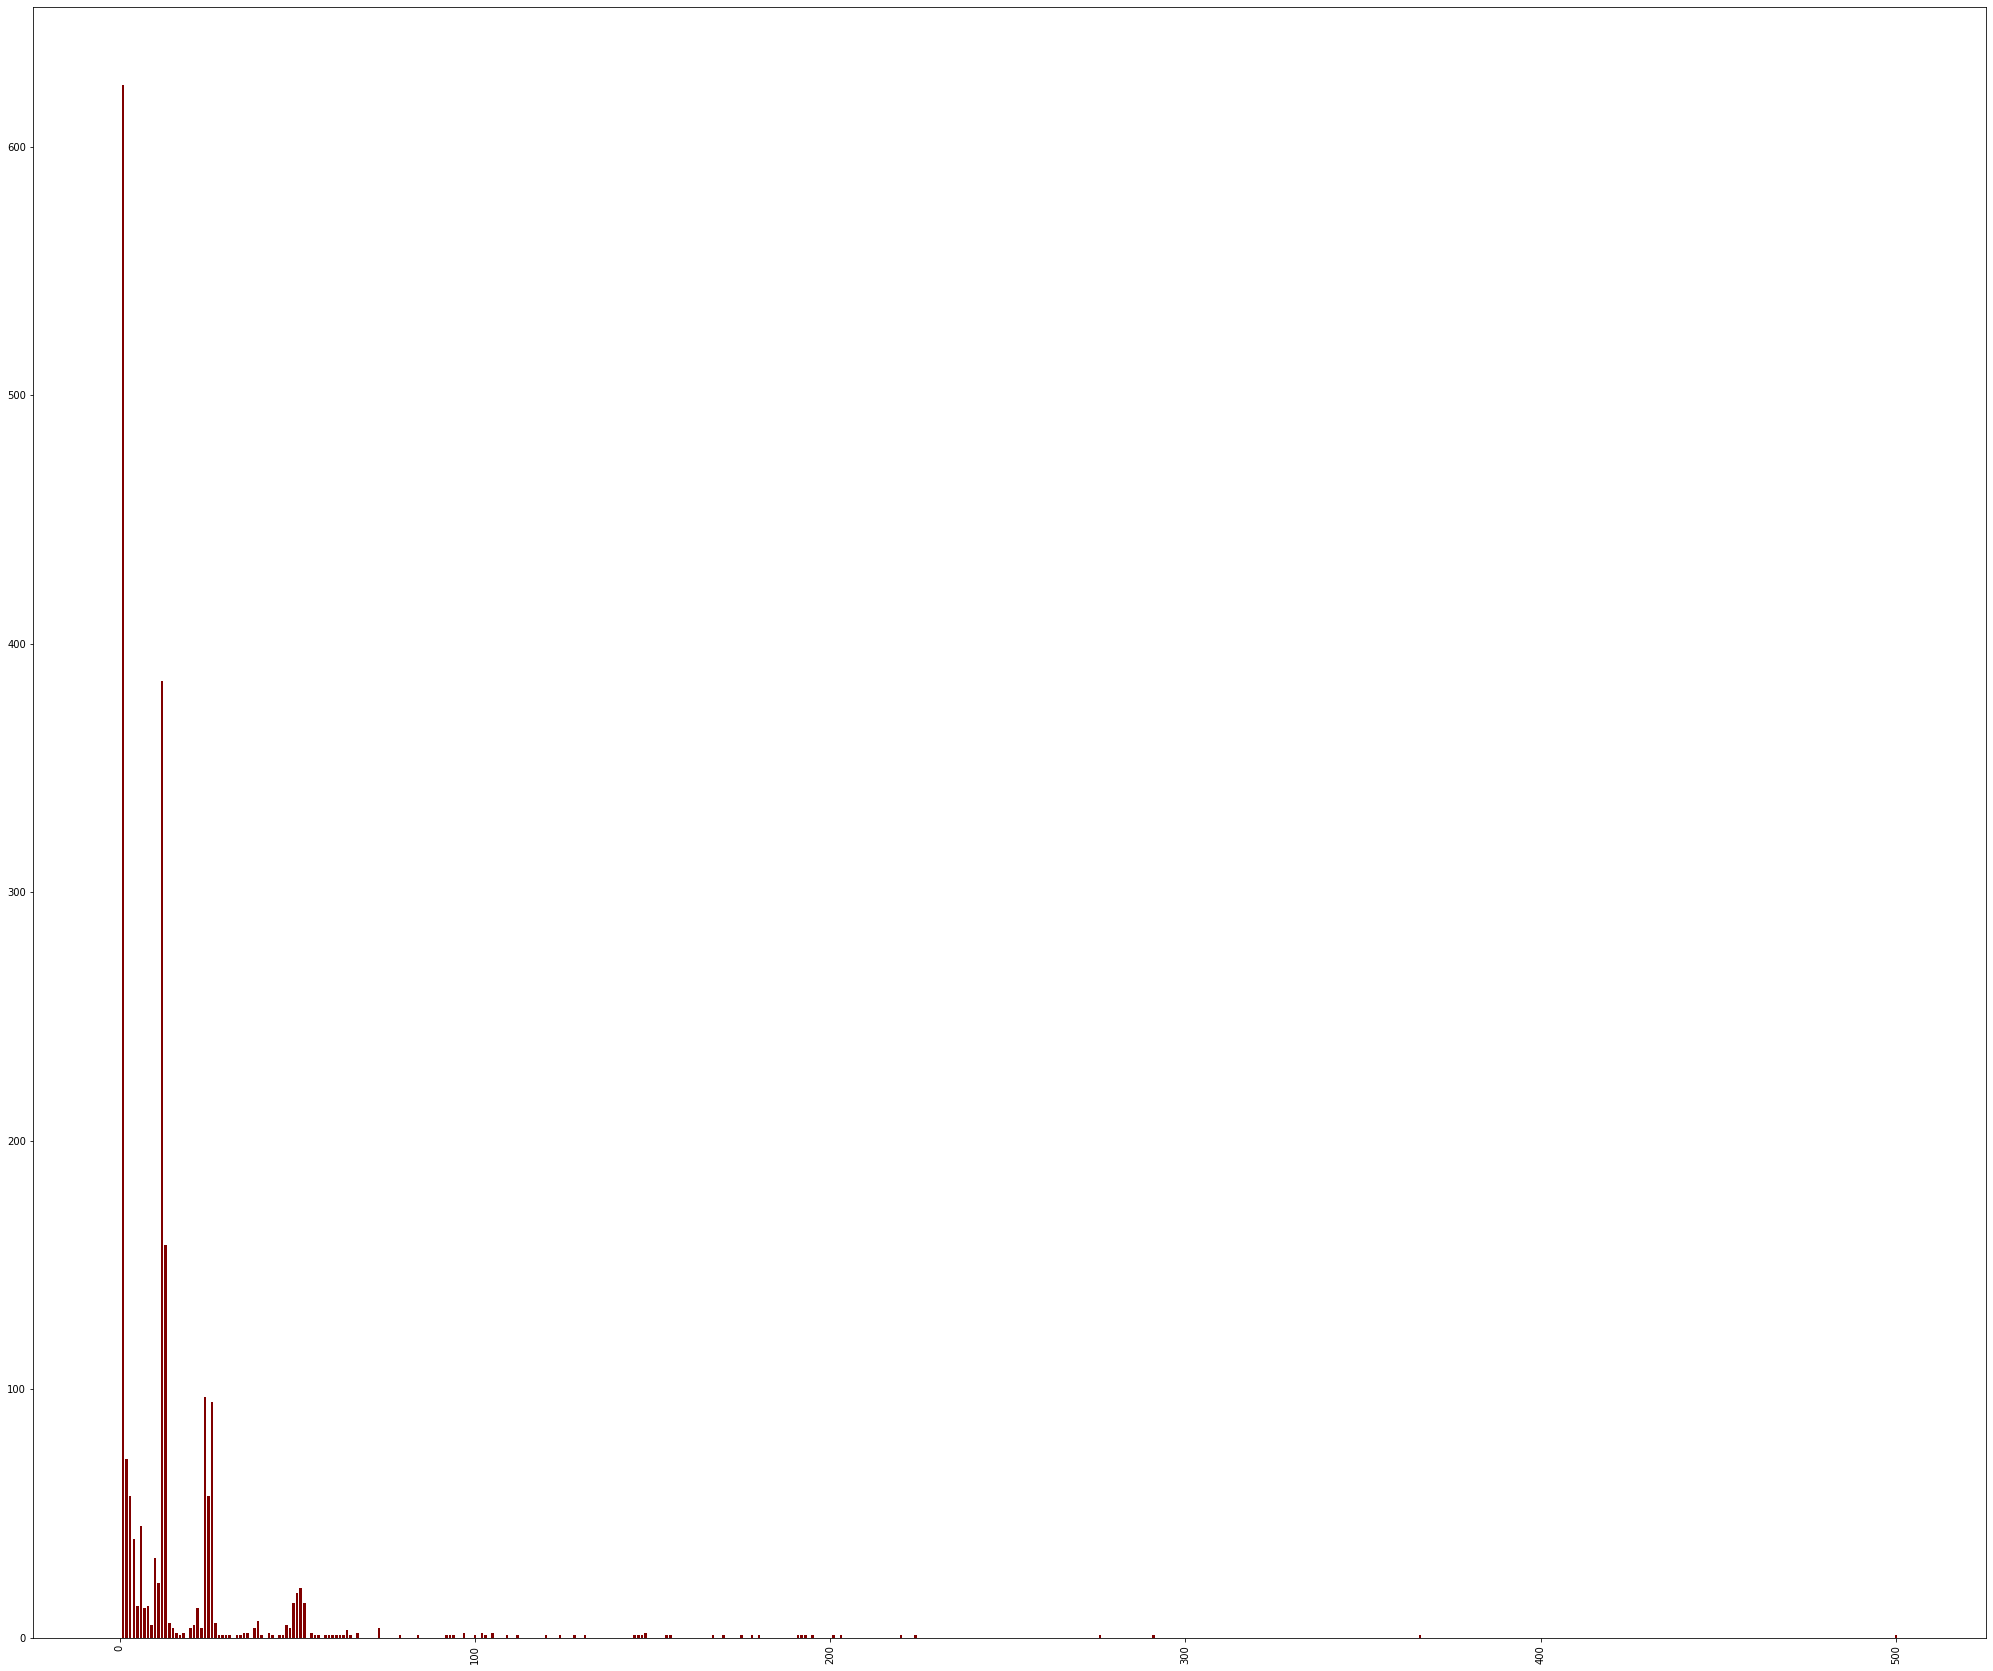

In [77]:
episodes_uniq_count=data["episodes"].value_counts()
fig = mpl.figure(figsize = (35, 30))
mpl.bar(episodes_uniq_count.index, episodes_uniq_count.values, color ='maroon', width = 0.7)
mpl.xticks(rotation=90)
mpl.show    #8b
print("Чаще всего встречается аниме с кол-вом эпизодов - ", episodes_uniq_count.index[0])

топ-3 популярных источника:
Manga          818
Original       468
Light novel    263
Name: source, dtype: int64


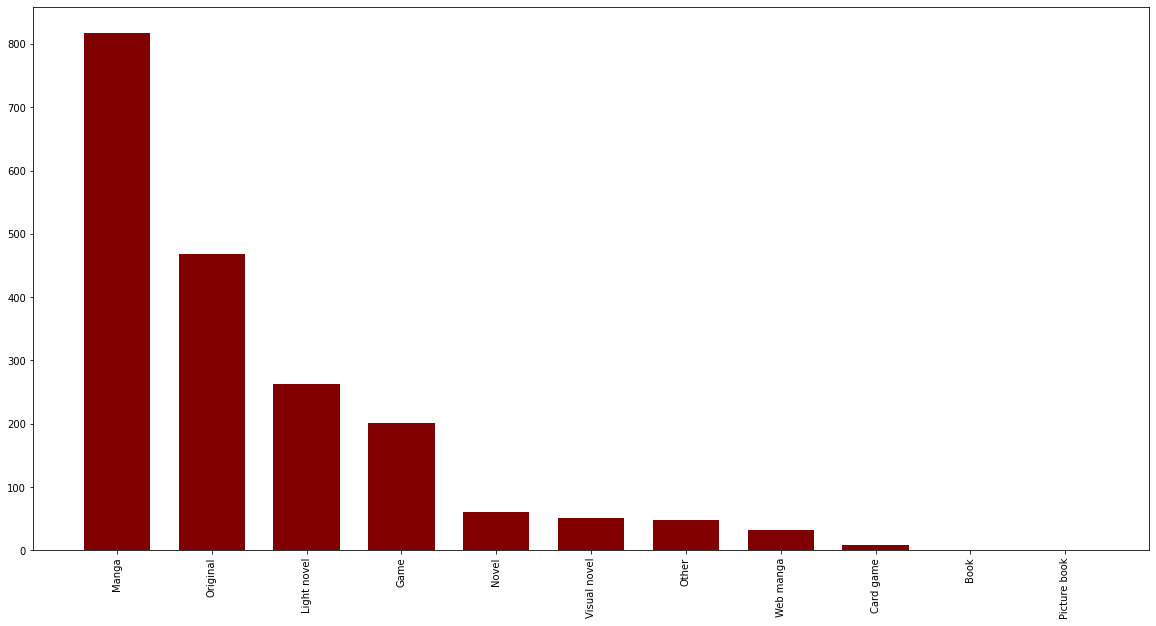

In [78]:
fig = mpl.figure(figsize = (20, 10))
mpl.bar(source_uniq_count.index, source_uniq_count.values, color ='maroon', width = 0.7)
mpl.xticks(rotation=90)
mpl.show    #8c
print("топ-3 популярных источника:")
print(source_uniq_count[0:3])

Наиболее популярная тема -  Super Power


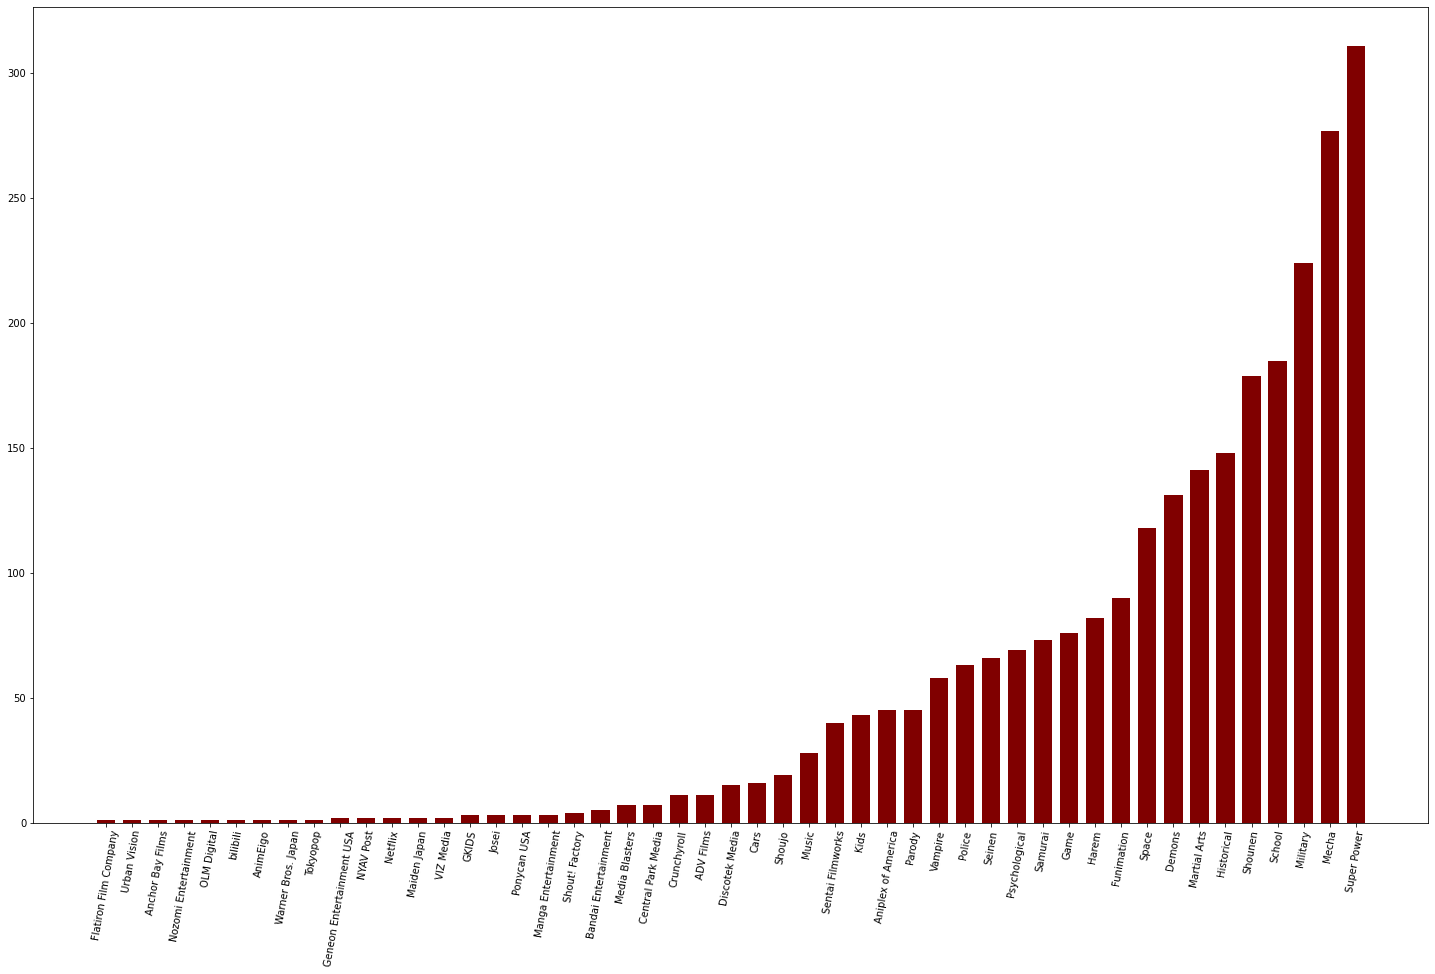

In [79]:
temp1=data['theme'].str.split(',')
temp2 = temp1.apply(pd.Series).stack().reset_index(drop = True)
theme_uniq_count=temp2.value_counts()
fig = mpl.figure(figsize = (25, 15))
mpl.bar(theme_uniq_count.index, theme_uniq_count.values, color ='maroon', width = 0.7)
mpl.xticks(rotation=80)
mpl.gca().invert_xaxis()
mpl.show    #8d
print("Наиболее популярная тема - ", theme_uniq_count.index[0])

Самый богатый год на выпущенные аниме  -  2018


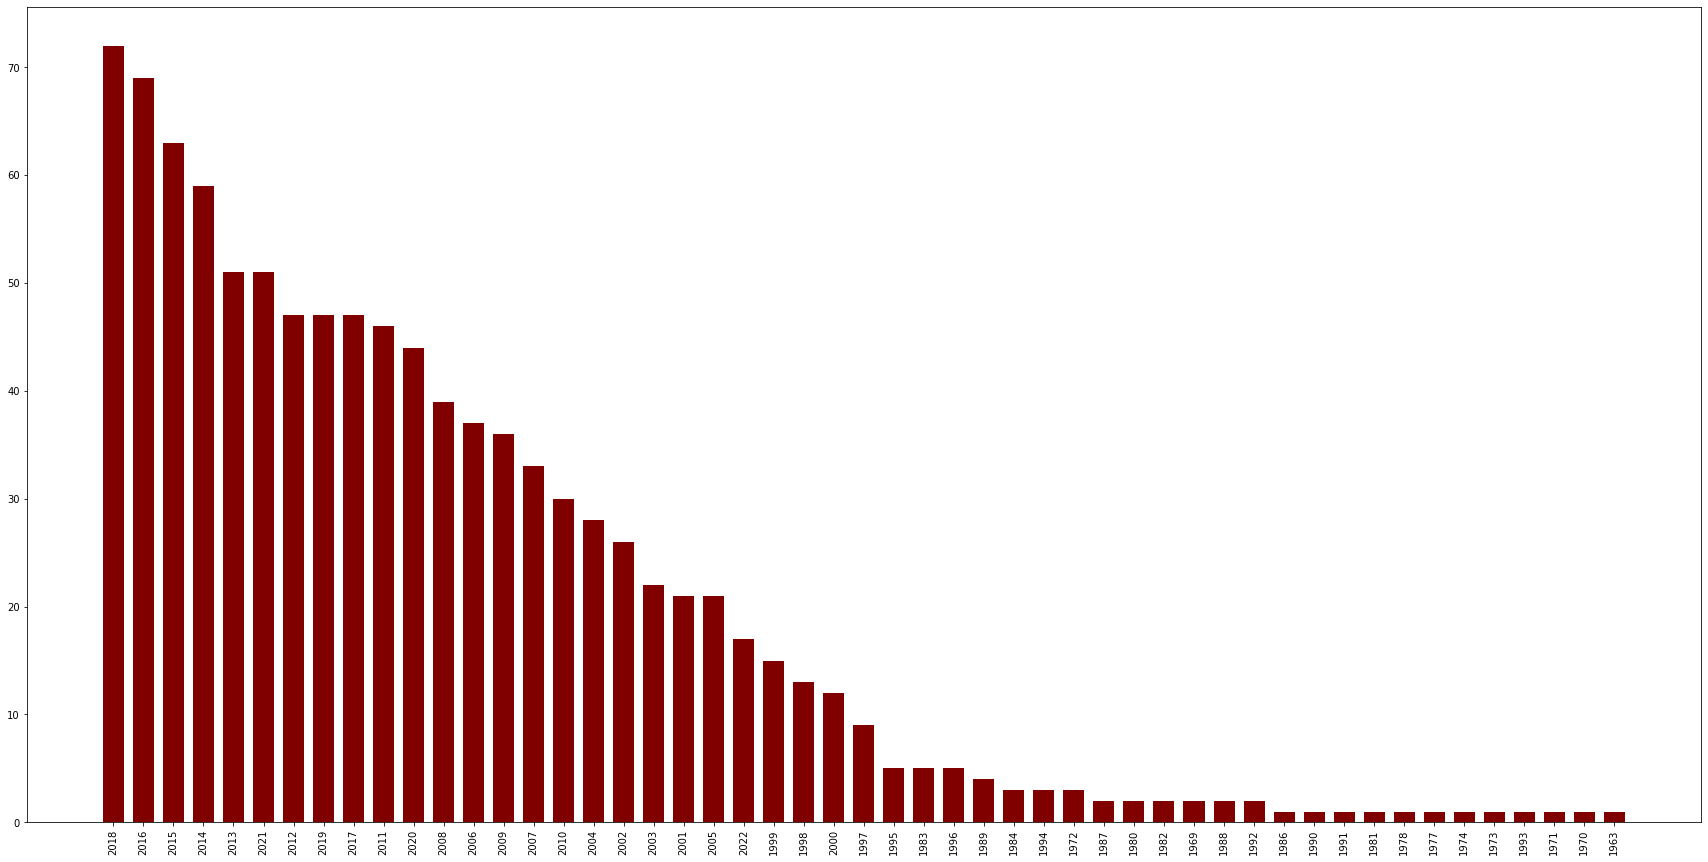

In [80]:
airdate_uniq_count=data["airdate"].str.extract(r'(\d{4})').dropna().value_counts()
fig = mpl.figure(figsize = (30, 15))
mpl.bar(airdate_uniq_count.index.get_level_values(0), airdate_uniq_count.values, color ='maroon', width = 0.7)
mpl.xticks(rotation=90)
mpl.show    #8e
print("Самый богатый год на выпущенные аниме  - ", airdate_uniq_count.index[0][0])

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


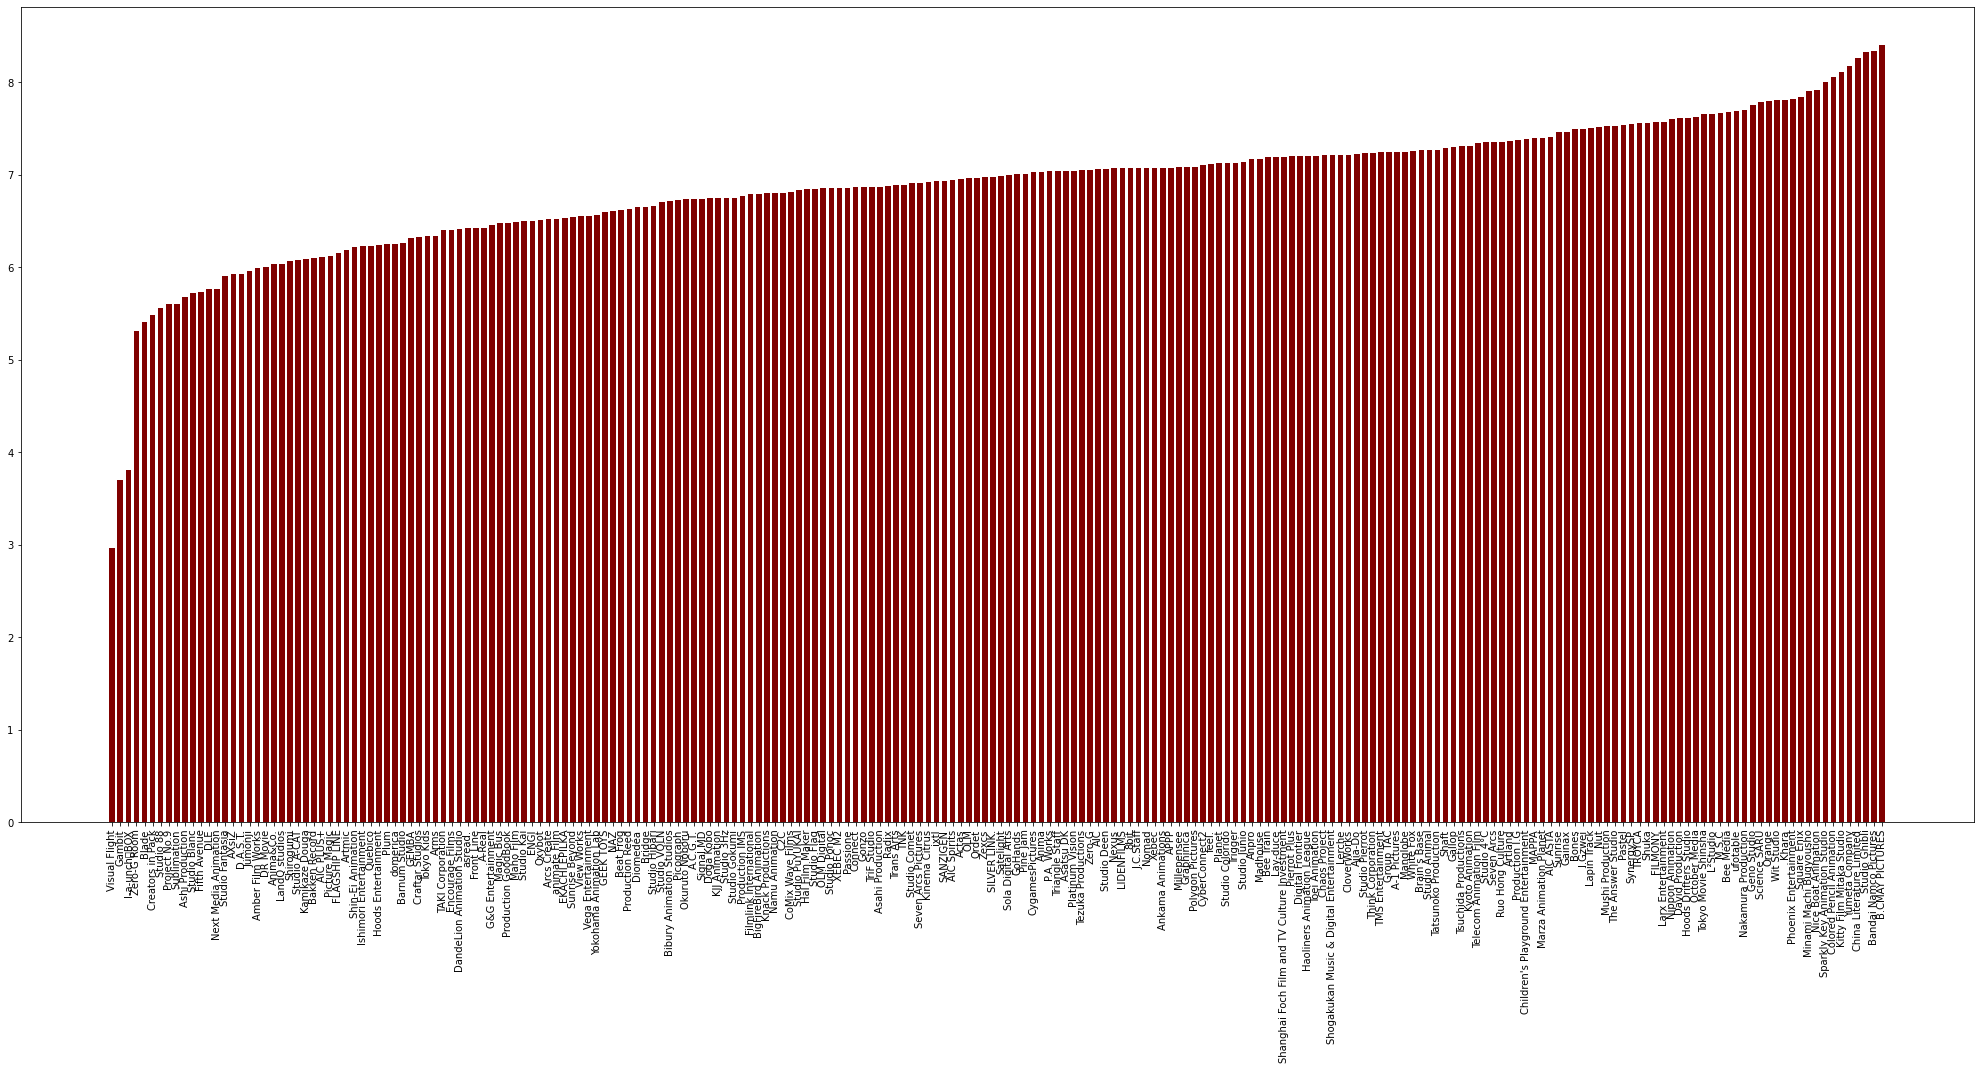

In [81]:

ratings = data.groupby(['production'])['rating'].mean().dropna().sort_values()
fig = mpl.figure(figsize = (35, 15))
mpl.bar(ratings.index, ratings, color ='maroon', width = 0.7)
mpl.xticks(rotation=90)
mpl.show    #9

<function matplotlib.pyplot.show>

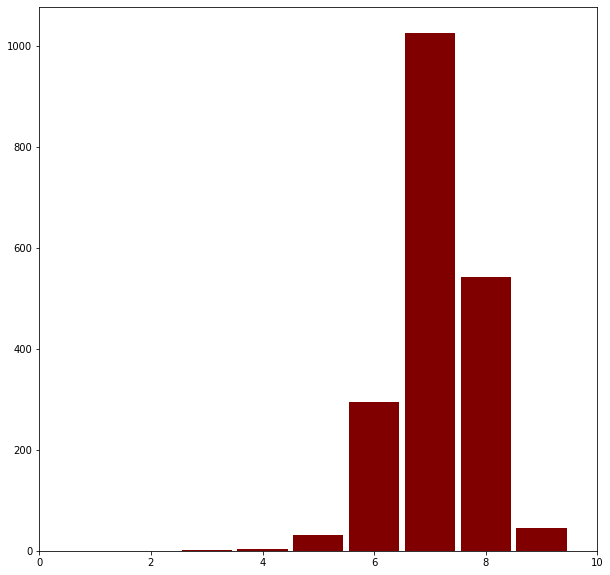

In [82]:
data = data.assign(rating_round = data['rating'].round())
rating_uniq_count_round=data.groupby('rating_round')['title'].count()
fig = mpl.figure(figsize = (10, 10))
mpl.bar(rating_uniq_count_round.index, rating_uniq_count_round, color ='maroon', width = 0.9)
mpl.xlim(0,10)
mpl.show    #10

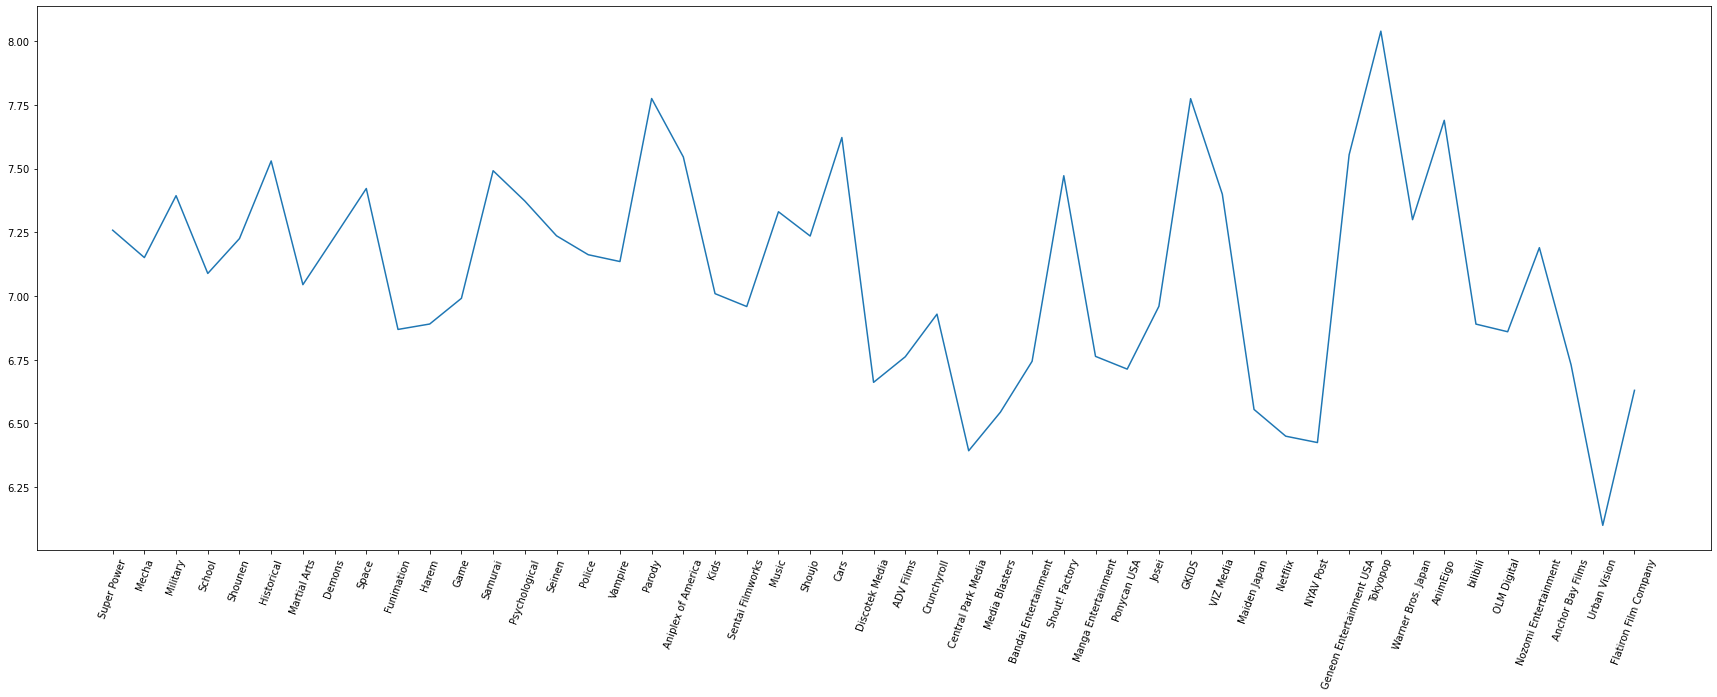

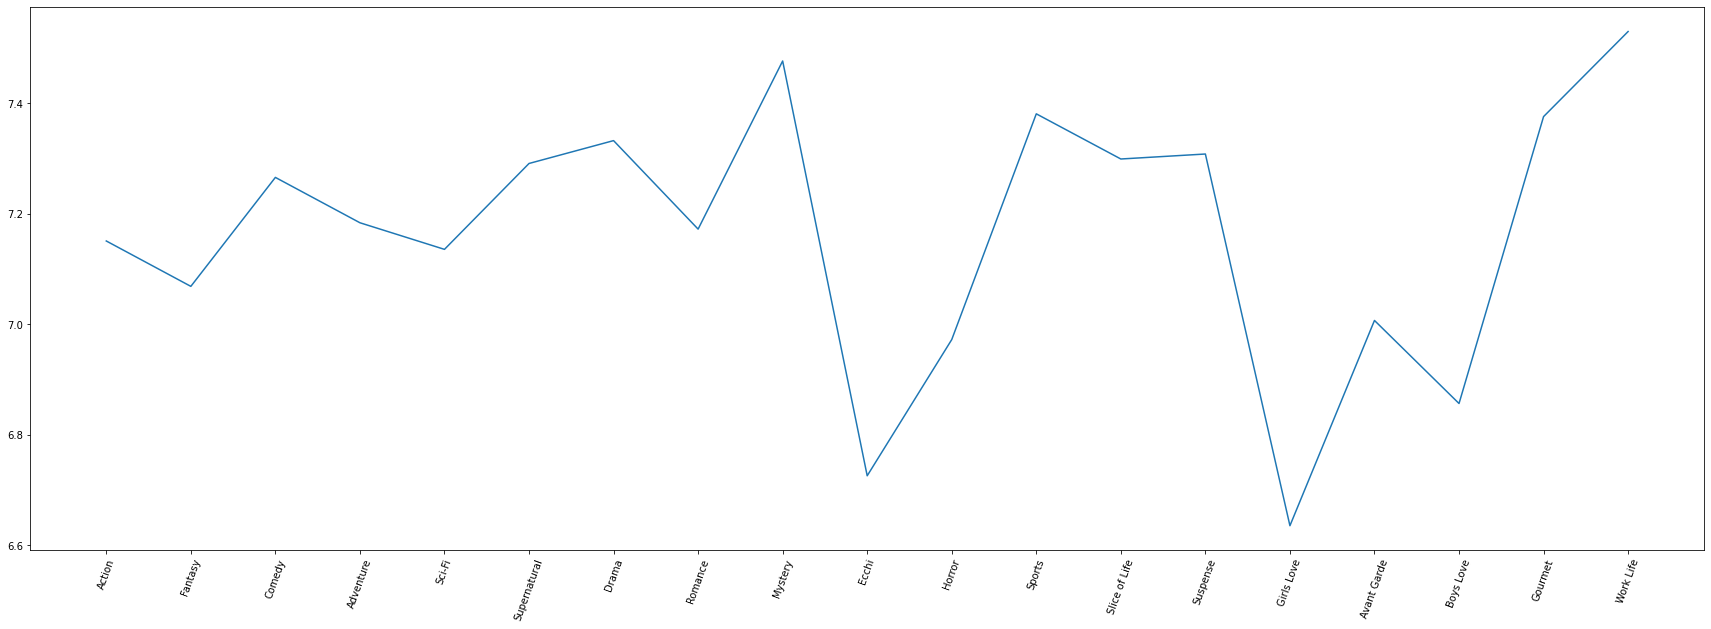

In [83]:
theme_rating=[]
for theme in theme_uniq_count.index:
  theme_rating.append(data[data["theme"].str.contains(theme)==True]['rating'].mean())
fig = mpl.figure(figsize = (30, 10))
mpl.plot(theme_uniq_count.index, theme_rating) 
mpl.xticks(rotation=70)
mpl.show()
genre_rating=[]
for genre in genre_diff.index:
  genre_rating.append(data[data["genre"].str.contains(genre)==True]['rating'].mean())
fig = mpl.figure(figsize = (30, 10))
mpl.plot(genre_diff.index, genre_rating) 
mpl.xticks(rotation=70)
mpl.show()

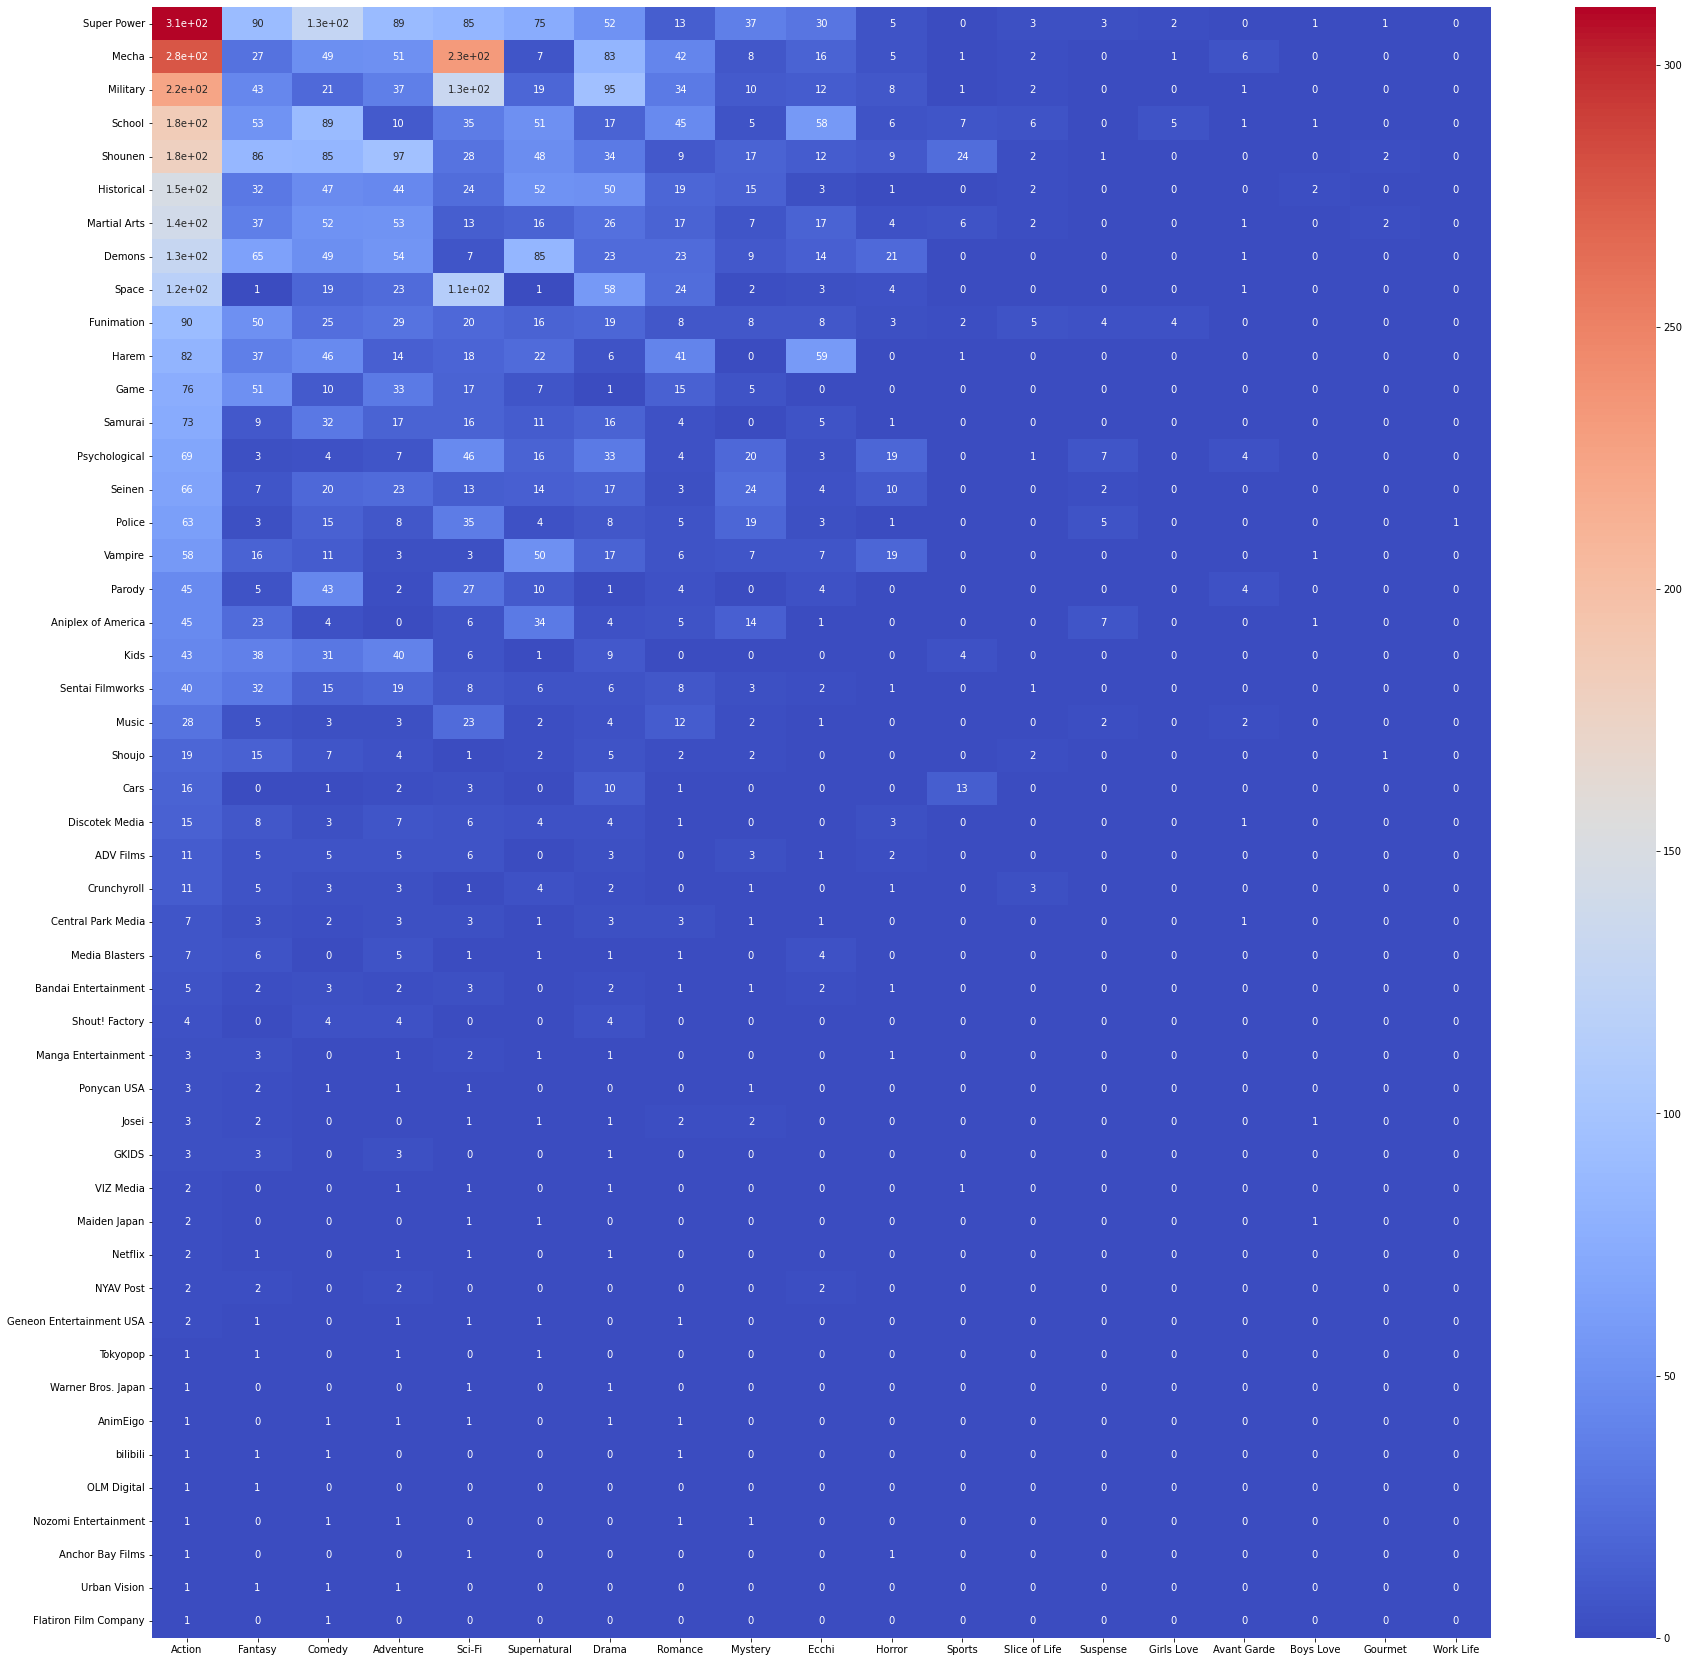

In [84]:
l1=[]
for theme in theme_uniq_count.index:
  tmp1=data[data["theme"].str.contains(theme)==True]
  l2=[]
  for genre in genre_diff.index:
    l2.append(tmp1[tmp1["genre"].str.contains(genre)==True].shape[0])
  l1.append(l2) 
tup=tuple(l1)
df = pd.DataFrame(tup, index = theme_uniq_count.index,columns = genre_diff.index) 
fig = mpl.figure(figsize = (30, 30))
sns.heatmap(df, annot = True, cmap = 'coolwarm')   #11-1(кол-во аниме в зависимости от темы и жанра)

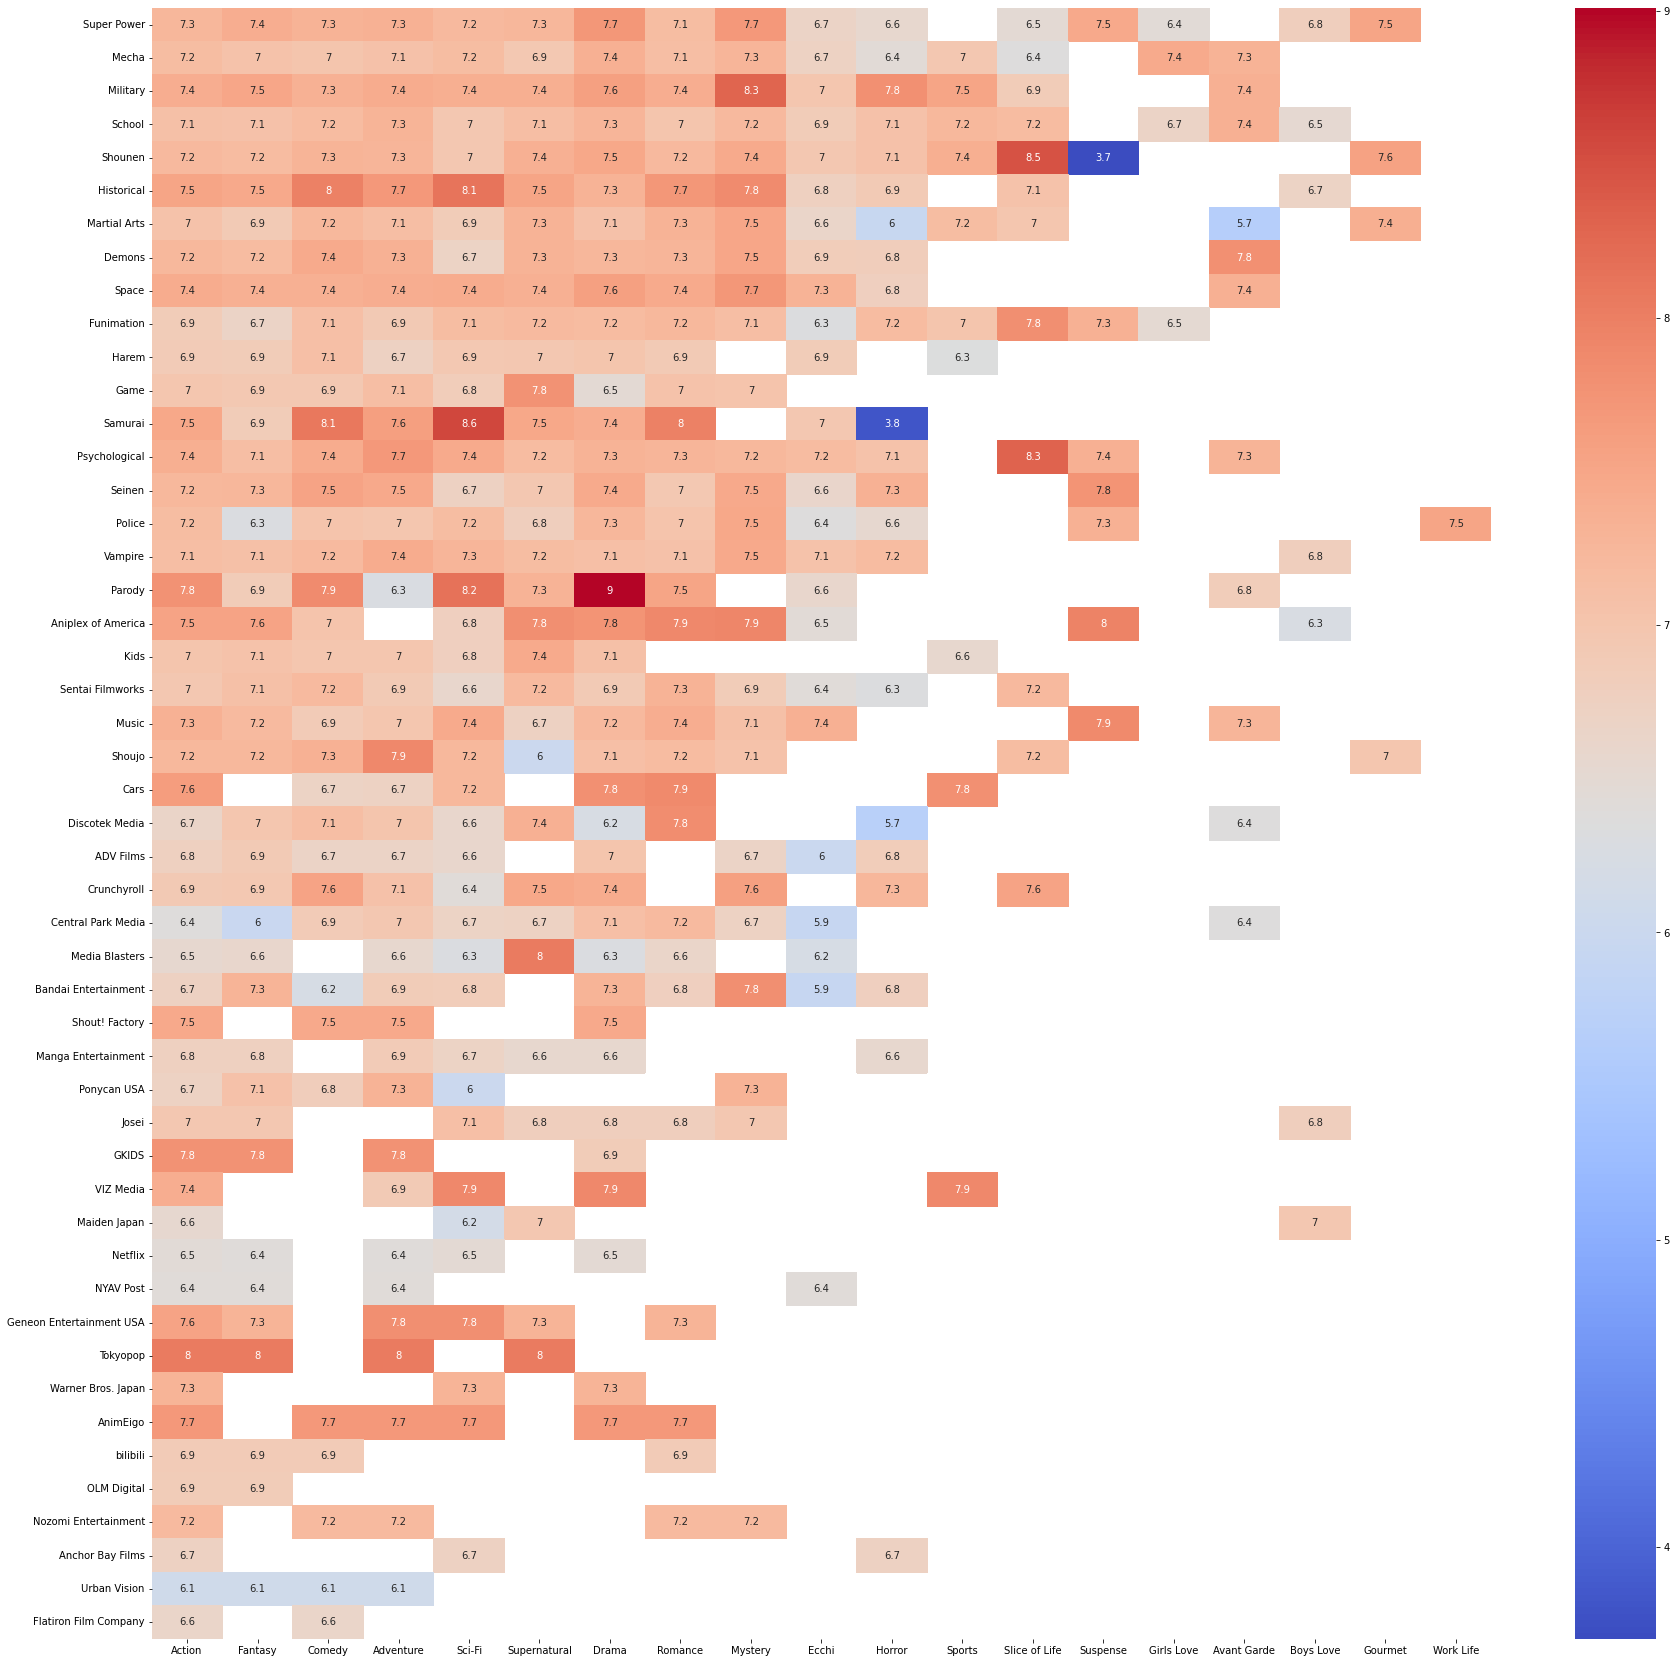

In [85]:
l1=[]
for theme in theme_uniq_count.index:
  tmp1=data[data["theme"].str.contains(theme)==True]
  l2=[]
  for genre in genre_diff.index:
    tmp2=tmp1[tmp1["genre"].str.contains(genre)==True]['rating'].mean()
    l2.append(tmp2)
  l1.append(l2) 
tup=tuple(l1)
df = pd.DataFrame(tup, index = theme_uniq_count.index,columns = genre_diff.index) 
fig = mpl.figure(figsize = (30, 30))
sns.heatmap(df, annot = True, cmap = 'coolwarm')   #11-2 (рейтинг в зависимости от темы и жанра)

<function matplotlib.pyplot.show>

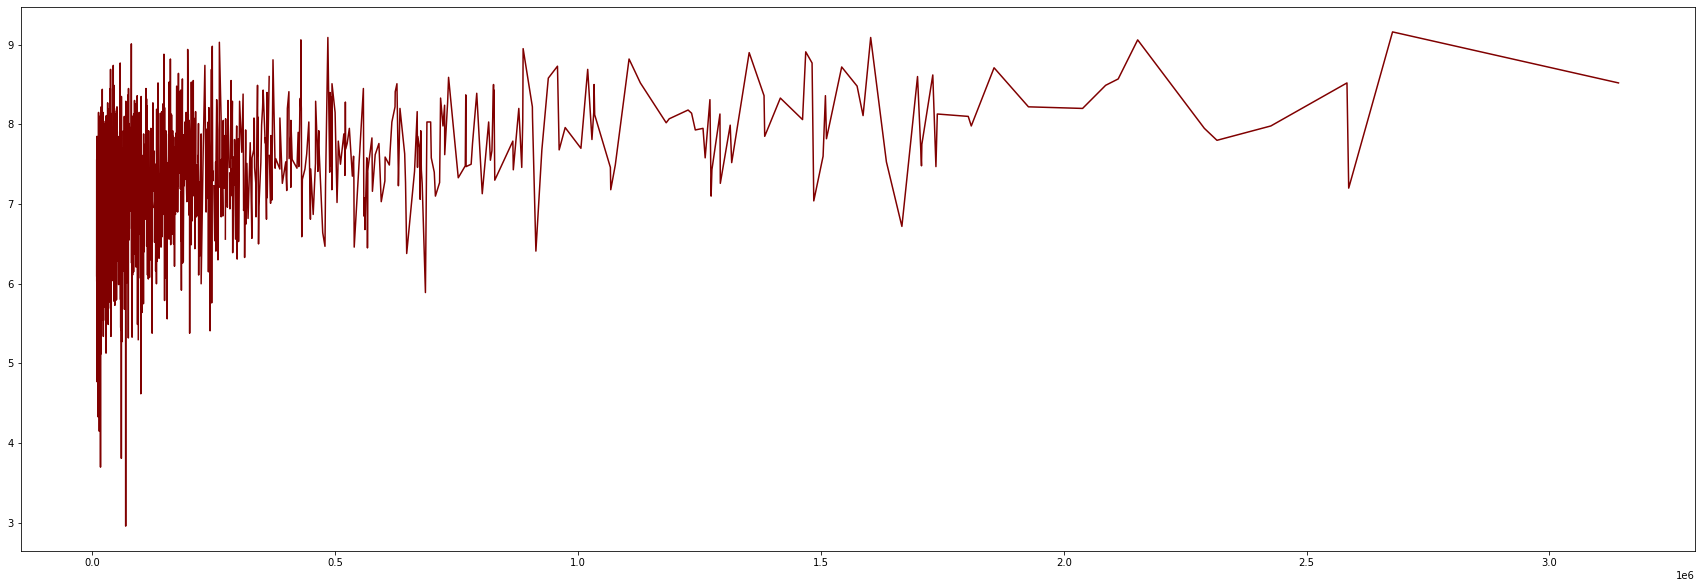

In [86]:
fig = mpl.figure(figsize = (30, 10))
mpl.plot(data['voters'],data['rating'], color ='maroon')
mpl.show    #12